# Frequency EDA

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import cleaned data
df = pd.read_csv('complaints_2018_final.csv')

In [2]:
#changed complaint date to datatime
df.cmplnt_fr_dt = df.cmplnt_fr_dt.apply(lambda x: pd.to_datetime(x))

In [3]:
df.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,...,population,area,county,zipcodes,adjusted_gross_income_(agi),avg_agi,total_income_amount,avg_total_income,taxable_income_amount,avg_taxable_income
0,453608592,2018-12-21,10:00 AM,2018-12-21,14:00:00,7.0,2019-01-02,341,petit_larceny,338,...,81305.0,2.628013e+07,New York,10002.0,2002349.0,46.126446,2033619.0,46.846786,1347603.0,52.867909
1,878647334,2018-10-17,14:30 PM,2018-10-18,18:40:00,104.0,2019-01-15,341,petit_larceny,349,...,98436.0,1.247863e+08,Queens,11385.0,1929001.0,40.653340,1948325.0,41.060590,1141610.0,34.149267
2,128026914,2018-12-24,20:00 PM,NaN,NaN,45.0,2019-01-02,341,petit_larceny,349,...,4438.0,1.158795e+07,Bronx,10464.0,163217.0,76.269626,165381.0,77.280841,116220.0,66.034091
3,997752766,2018-09-17,07:00 AM,NaN,NaN,62.0,2019-01-07,112,theft_fraud,739,...,77354.0,4.355518e+07,Kings,11204.0,1606891.0,50.499403,1629709.0,51.216499,902117.0,47.680603
4,746011851,2018-09-04,10:00 AM,NaN,NaN,52.0,2019-12-09,116,sex_crimes,168,...,97932.0,6.933617e+07,Bronx,10467.0,1357285.0,31.616236,1368864.0,31.885954,710802.0,25.819179


In [4]:
#check for nulls
df.isnull().sum() # These nulls are for complaints solved on a different date

cmplnt_num                          0
cmplnt_fr_dt                        0
cmplnt_fr_tm                        0
cmplnt_to_dt                   121989
cmplnt_to_tm                   121493
addr_pct_cd                         0
rpt_dt                              0
ky_cd                               0
ofns_desc                           0
pd_cd                               0
pd_desc                             0
law_cat_cd                          0
boro_nm                             0
prem_typ_desc                       0
susp_age_group                      0
susp_race                           0
susp_sex                            0
latitude                            0
longitude                           0
patrol_boro                         0
vic_age_group                       0
vic_race                            0
vic_sex                             0
neighborhood                      615
population                          0
area                                0
county      

In [17]:
#checking offense column
df['ofns_desc']

0                        petit_larceny
1                        petit_larceny
2                        petit_larceny
3                          theft_fraud
4                           sex_crimes
                      ...             
917451                   petit_larceny
917452    assault_3_&_related_offenses
917453                   petit_larceny
917454                   petit_larceny
917455                   petit_larceny
Name: ofns_desc, Length: 917456, dtype: object

In [18]:
#Relabeling the crime offense column
#---
def sort_crime(column):
    column = str(column).upper()
    if 'ASSAULT' in column:
        return 'ASSAULT'.lower()
    elif 'MURDER' in column or 'HOMICIDE' in column:
        return 'MURDER'.lower()
    elif 'HARRASSMENT' in column:
        return 'HARRASSMENT'.lower()
    elif 'SEX' in column:
        return "SEX_CRIMES".lower()
    elif 'PETIT_LARCENY' in column:
        return 'PETIT_LARCENY'.lower()
    elif 'GRAND_LARCENY' in column:
        return 'GRAND LARCENY'.lower()
    elif 'FELONY ASSAULT' in column:
        return 'FELONY ASSAULT'.lower()
    elif 'BURGLAR' in column:
        return 'BURGLAR'.lower()
    elif 'KIDNAPPING' in column:
        return 'KIDNAPPING'.lower()
    elif 'FRAUD' in column:
        return 'FRAUD'.lower()
    elif 'GAMBLING' in column:
        return'GAMBLING'.lower()
    elif 'MOTOR' in column or 'TRAFFIC' in column or 'VEHICLE' in column or 'DRIVING' in column :
        return 'MOTOR_VEHICLE_CRIME'.lower()
    elif 'CRIMINAL_MISCHIEF' in column:
        return 'CRIMINAL_MISCHIEF'.lower()
    elif 'DRUGS' in column:
        return 'DRUGS'.lower()
    elif 'THEF' in column or 'STOLEN' in column:
        return 'THEFT'.lower()
    elif 'LAW' in column:
        return 'UNCLASSIFIED_LAW'.lower()
    elif 'TRESPASS' in column:
        return "TRESPASS".lower()
    elif 'OFF' in column and 'THEF'not in column:
        return 'OFFENSE'.lower()
    elif 'ARSON' in column:
        return 'ARSON'.lower()
    elif 'FORGERY' in column:
        return 'FORGERY'.lower()
    elif 'WEAP' in column:
        return 'WEAPON'.lower()
    elif 'CHILD' in column or 'ABORTION' in column:
        return 'CHILD_RELATED'.lower()
    elif 'JOST' in column or 'CONDUCT' in column:
        return "DISORDERLY_CONDUCT".lower()
    elif 'ROBBERY' in column:
        return 'ROBBERY'.lower()
    else:
        return 'misc_other'

In [19]:
# relabeling crime in a different column
df['crime_type'] = df['ofns_desc'].map(sort_crime)
df['crime_type'][:10]

0    petit_larceny
1    petit_larceny
2    petit_larceny
3            fraud
4       sex_crimes
5            fraud
6          assault
7            arson
8          offense
9    petit_larceny
Name: crime_type, dtype: object

In [20]:
#checking crime type
df['crime_type'].value_counts()

petit_larceny          174831
assault                146384
harrassment            141584
grand larceny           96072
criminal_mischief       93995
offense                 57820
unclassified_law        29876
drugs                   28541
robbery                 26150
motor_vehicle_crime     25898
burglar                 23001
fraud                   14746
weapon                  14137
sex_crimes              13505
forgery                  9908
theft                    6590
trespass                 6287
misc_other               5197
arson                    1427
murder                    629
gambling                  444
kidnapping                254
disorderly_conduct        142
child_related              38
Name: crime_type, dtype: int64

In [21]:
# relabeling crime as ordinal value
def crime_value(column):
    if column.upper() == 'MISDEMEANOR':
        return 2
    elif column.upper() == 'VIOLATION':
        return 1
    elif column.upper() == 'FELONY':
        return 3
df['crime_level'] = df['law_cat_cd'].map(crime_value)
df['crime_level']

0         2
1         2
2         2
3         3
4         3
         ..
917451    2
917452    2
917453    2
917454    2
917455    2
Name: crime_level, Length: 917456, dtype: int64

In [22]:
df.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,law_cat_cd,boro_nm,prem_typ_desc,susp_age_group,susp_race,susp_sex,latitude,longitude,patrol_boro,vic_age_group,vic_race,vic_sex,neighborhood,population,area,county,zipcodes,adjusted_gross_income_(agi),avg_agi,total_income_amount,avg_total_income,taxable_income_amount,avg_taxable_income,crime_type,crime_level
0,453608592,2018-12-21,10:00 AM,2018-12-21,14:00:00,7.0,2019-01-02,341,petit_larceny,338,larceny_petit_from_building_un,misdemeanor,manhattan,public_school,0,unknown,u,40.713719,-73.986088,man_south,unknown,unknown,d,MANHATTAN,81305.0,2.628013e+07,New York,10002.0,2002349.0,46.126446,2033619.0,46.846786,1347603.0,52.867909,petit_larceny,2
1,878647334,2018-10-17,14:30 PM,2018-10-18,18:40:00,104.0,2019-01-15,341,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,queens,street,0,unknown,u,40.703678,-73.860521,queens_north,2544,white_hispanic,f,QUEENS,98436.0,1.247863e+08,Queens,11385.0,1929001.0,40.653340,1948325.0,41.060590,1141610.0,34.149267,petit_larceny,2
2,128026914,2018-12-24,20:00 PM,NaN,NaN,45.0,2019-01-02,341,petit_larceny,349,larceny_petit_of_license_plate,misdemeanor,bronx,street,0,unknown,u,40.850475,-73.787007,bronx,4564,white,f,BRONX,4438.0,1.158795e+07,Bronx,10464.0,163217.0,76.269626,165381.0,77.280841,116220.0,66.034091,petit_larceny,2
3,997752766,2018-09-17,07:00 AM,NaN,NaN,62.0,2019-01-07,112,theft_fraud,739,fraud_unclassified_felony,felony,brooklyn,residence_house,0,unknown,u,40.610568,-73.986665,bklyn_south,unknown,unknown,f,BROOKLYN,77354.0,4.355518e+07,Kings,11204.0,1606891.0,50.499403,1629709.0,51.216499,902117.0,47.680603,fraud,3
4,746011851,2018-09-04,10:00 AM,NaN,NaN,52.0,2019-12-09,116,sex_crimes,168,sodomy_1,felony,bronx,residence_apt_house,unknown,unknown,m,40.869059,-73.879630,bronx,<18,white_hispanic,f,BRONX,97932.0,6.933617e+07,Bronx,10467.0,1357285.0,31.616236,1368864.0,31.885954,710802.0,25.819179,sex_crimes,3


### INCOME

In [23]:
df.columns

Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt',
       'cmplnt_to_tm', 'addr_pct_cd', 'rpt_dt', 'ky_cd', 'ofns_desc', 'pd_cd',
       'pd_desc', 'law_cat_cd', 'boro_nm', 'prem_typ_desc', 'susp_age_group',
       'susp_race', 'susp_sex', 'latitude', 'longitude', 'patrol_boro',
       'vic_age_group', 'vic_race', 'vic_sex', 'neighborhood', 'population',
       'area', 'county', 'zipcodes', 'adjusted_gross_income_(agi)', 'avg_agi',
       'total_income_amount', 'avg_total_income', 'taxable_income_amount',
       'avg_taxable_income', 'crime_type', 'crime_level'],
      dtype='object')

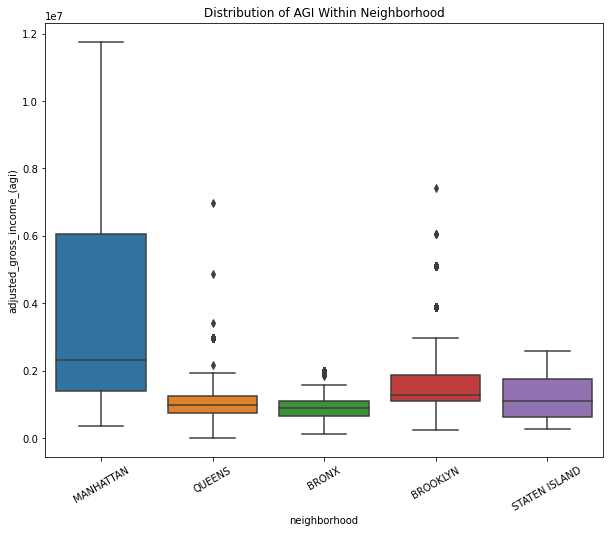

In [24]:
plt.figure(figsize = (10, 8))
plt.xticks(rotation = 30)
plt.title('Distribution of AGI Within Neighborhood')
plt.ylabel('Adjusted Gross Income')
sns.boxplot(x= df['neighborhood'], y = df['adjusted_gross_income_(agi)'].sort_values());

There is a large difference in income of Manhatten compared to the rest of NYC.  Queens, Bronx, Brooklyn and Staten Island are simliar.

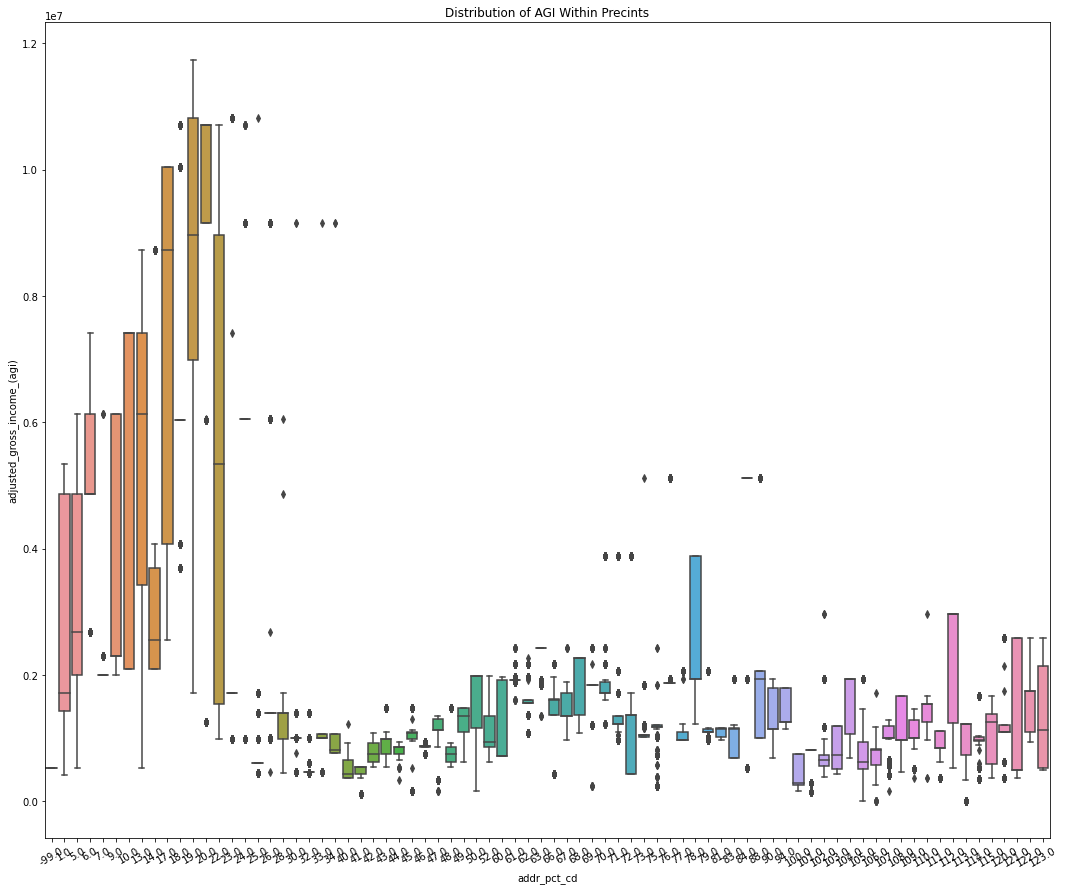

In [25]:
#Adjusted income by precinct
plt.figure(figsize = (18, 15))
plt.xticks(rotation = 30)
plt.title('Distribution of AGI Within Precints')
sns.boxplot(x= df['addr_pct_cd'], y = df['adjusted_gross_income_(agi)'].sort_values());

The precincts with the highest imcomes are in the lower manhattan area. As you go north the precincts go up in value into the Bronx. Starting from precinct 50, precincts numbers move into the Brooklyn area, and Queens area. Staten Island has the highest precinct numbers.  This is important to understand how the precincts are layed out and where funds should be allocated. This analysis is from the ArcGIS precinct to crime map. 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917456 entries, 0 to 917455
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   cmplnt_num                   917456 non-null  int64         
 1   cmplnt_fr_dt                 917456 non-null  datetime64[ns]
 2   cmplnt_fr_tm                 917456 non-null  object        
 3   cmplnt_to_dt                 795467 non-null  object        
 4   cmplnt_to_tm                 795963 non-null  object        
 5   addr_pct_cd                  917456 non-null  float64       
 6   rpt_dt                       917456 non-null  object        
 7   ky_cd                        917456 non-null  int64         
 8   ofns_desc                    917456 non-null  object        
 9   pd_cd                        917456 non-null  int64         
 10  pd_desc                      917456 non-null  object        
 11  law_cat_cd                

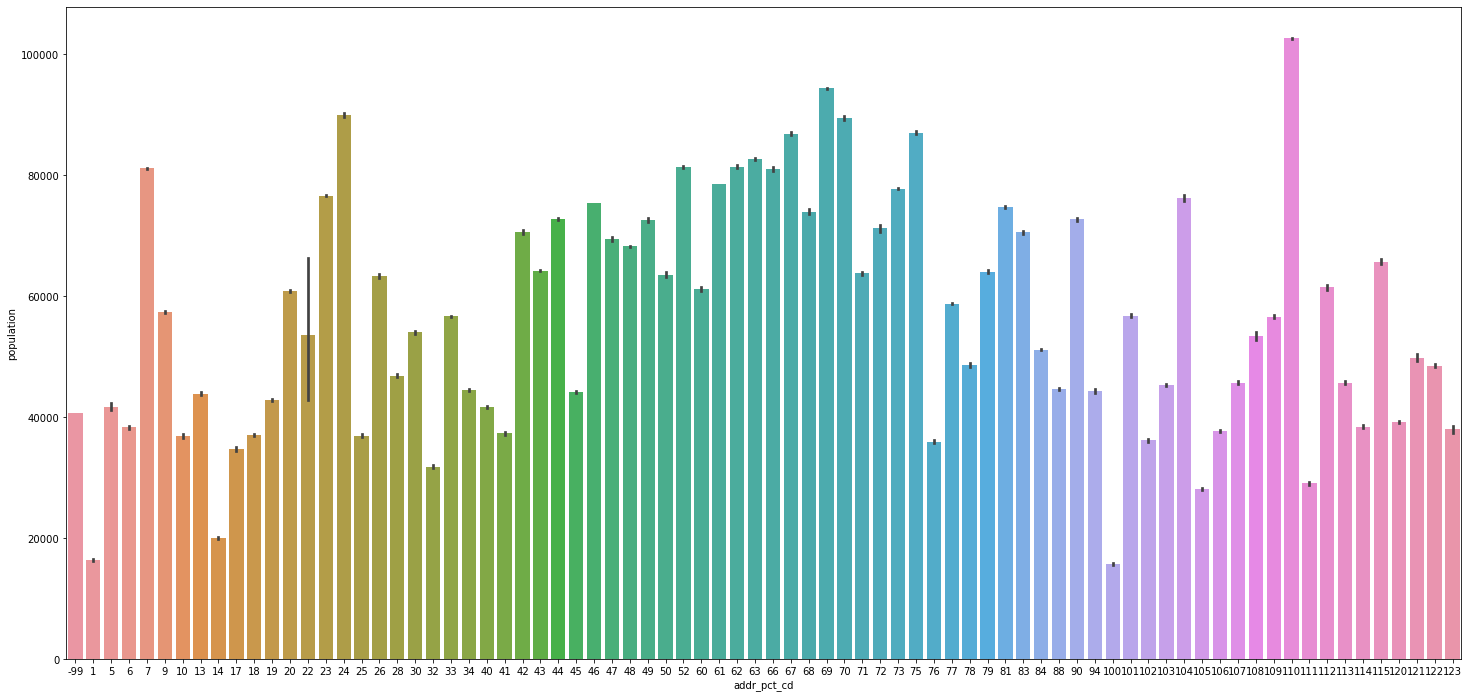

In [27]:
df['addr_pct_cd'] = df['addr_pct_cd'].astype('int64')
plt.figure(figsize = (25,12))
sns.barplot(x='addr_pct_cd',y='population', data=df)

When looking at income, it is also important to look at the population of the area.  By comparing the two charts, we see that the Manhattan area has less people but a higher income.  This shows that the population in lower/middle Manhattan (closer to the Central park) are highest income area.  (Also good to evaluate on a map)

### CRIME TIME

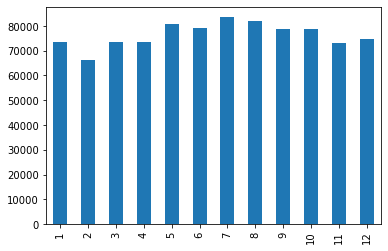

In [30]:
# total crimes a month
df['cmplnt_fr_dt'].dt.month.value_counts().sort_index().plot(kind= 'bar')

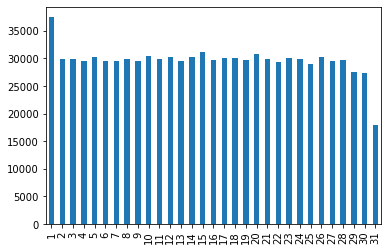

In [31]:
# total crimes by day
df['cmplnt_fr_dt'].dt.day.value_counts().sort_index().plot(kind= 'bar')

There is a jump on crimes committed on the first day of the month. There is also a decline on the 31, and from the 28th to 2

In [32]:
day_1 = df[df['cmplnt_fr_dt'].dt.day == 1]

In [33]:
day_1['law_cat_cd'].value_counts()

misdemeanor    20612
felony         11250
violation       5617
Name: law_cat_cd, dtype: int64

In [34]:
day_2 = df[df['cmplnt_fr_dt'].dt.day == 2]#.groupby['law_cat_cd']

In [35]:
day_2['law_cat_cd'].value_counts()

misdemeanor    16032
felony          9208
violation       4703
Name: law_cat_cd, dtype: int64

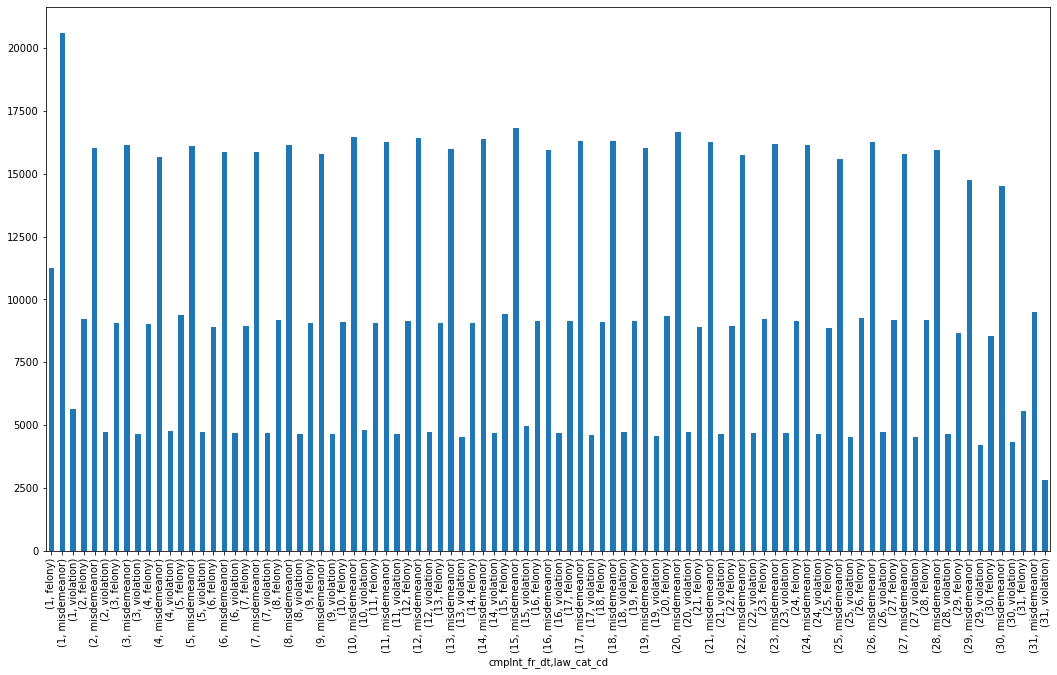

In [36]:
df.groupby([df['cmplnt_fr_dt'].dt.day,df ['law_cat_cd'] ])['law_cat_cd'].count().plot(kind='bar', figsize =(18,10))

There is a small jump on the first day of the month. High rise in misdemeanor

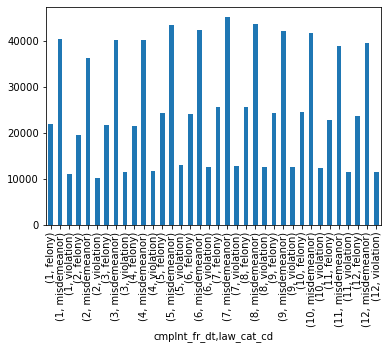

In [60]:
df.groupby([df['cmplnt_fr_dt'].dt.month,df ['law_cat_cd'] ])['law_cat_cd'].count().plot(kind='bar')

Want to check the effects of weather on Crime. I would assume colder months less crime, however, holidays are another factor. Using just jupyter notebook was hard to visualize the crime.  Therefore I charted it in ArcGIS.
- Check Crime on January 1 compared to other dates, and close to Holidays


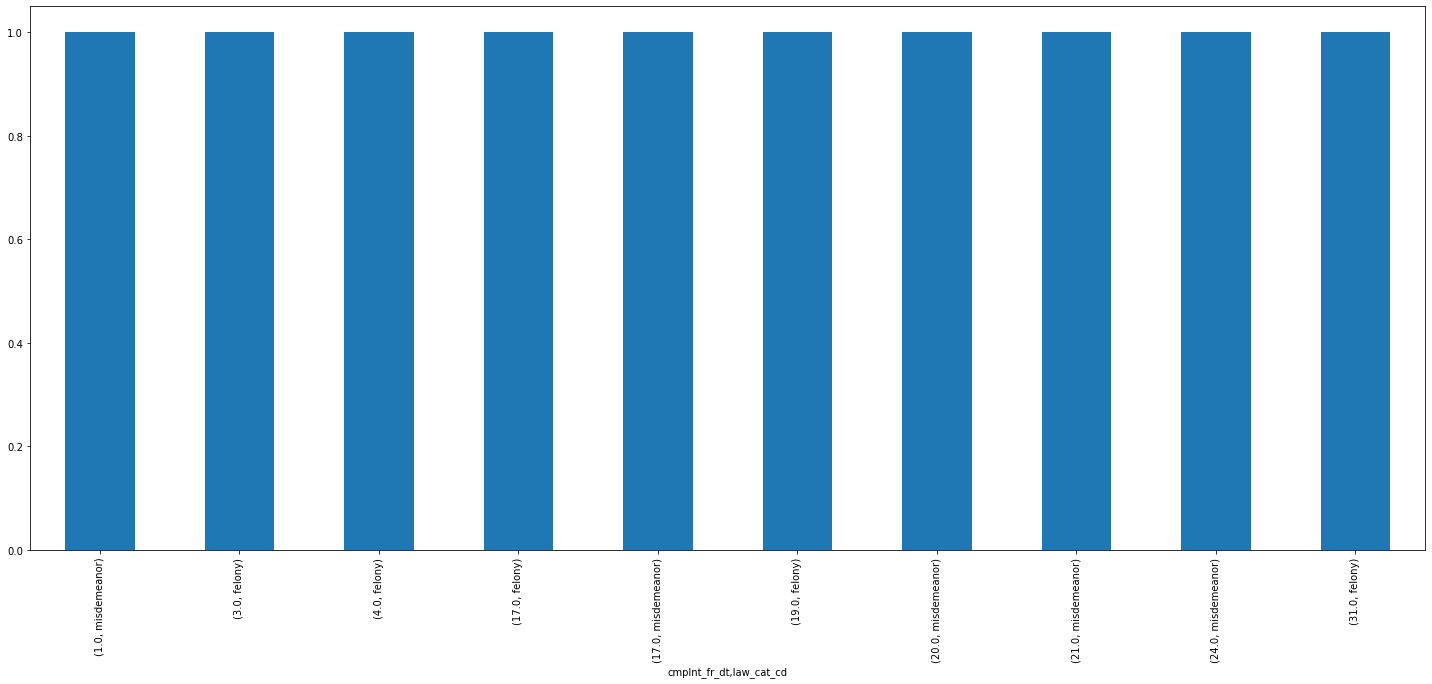

In [37]:
df.groupby([df['cmplnt_fr_dt'].dt.day.head(10),df ['law_cat_cd'] ])['law_cat_cd'].count().plot(kind='bar', figsize =(25,10))

From this point, I loaded our dataset into ArcGIS and completed the rest of the EDA and visualization through the software.
Things I visualized were:
- frequency of crime with dates
- population and crime correlation
- income and crime correlation
- precinct and crime correlation
- crime to holiday correlation